# Simple Linear Regression

In [3]:
#1) Delivery_time -> Predict delivery time using sorting time 
#2) Salary_hike -> Build a prediction model for Salary_hike

#------------------------------------------------------------

#Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [3]:
deli = pd.read_csv("delivery_time.csv")

In [4]:
deli.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA

In [5]:
deli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
deli.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
deli.shape

(21, 2)

In [8]:
deli.skew()

Delivery Time    0.352390
Sorting Time     0.047115
dtype: float64

In [9]:
deli.kurt()

Delivery Time    0.317960
Sorting Time    -1.148455
dtype: float64

C:\Users\pprat\AppData\Local\Temp\ipykernel_26368\3361684531.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(deli["Delivery Time"])


<Axes: xlabel='Delivery Time', ylabel='Density'>

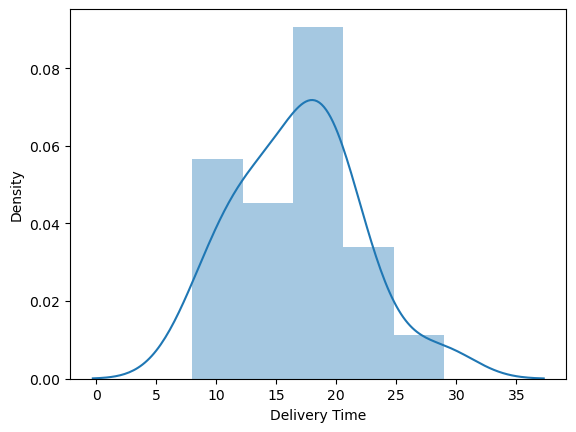

In [10]:
sns.distplot(deli["Delivery Time"])

C:\Users\pprat\AppData\Local\Temp\ipykernel_26368\3118229842.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(deli["Sorting Time"])


<Axes: xlabel='Sorting Time', ylabel='Density'>

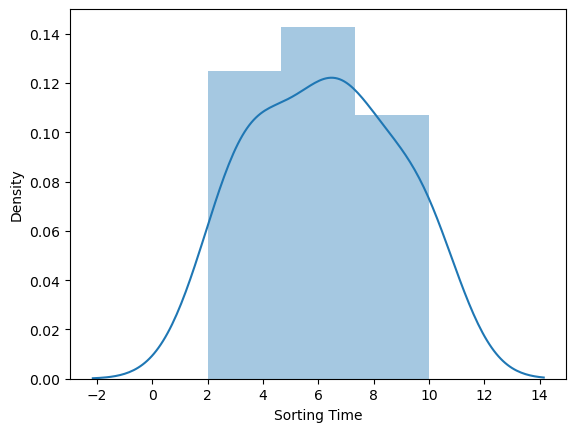

In [11]:
sns.distplot(deli["Sorting Time"])

In [12]:
deli=deli.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)


In [13]:
deli.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# outliers checking (boxplot)

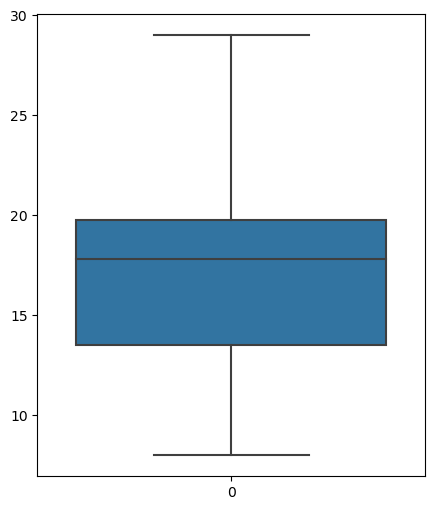

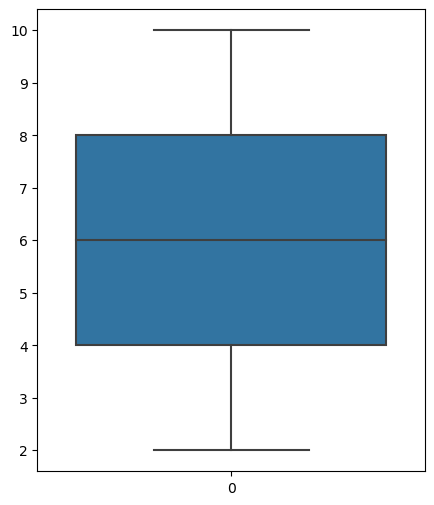

In [14]:
plt.figure(figsize = (5,6))
sns.boxplot(deli.delivery_time)

plt.figure(figsize = (5,6))
sns.boxplot(deli.sorting_time)
plt.show()

In [15]:
# NO Outliers detect

C:\Users\pprat\AppData\Local\Temp\ipykernel_26368\2822887466.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(deli.delivery_time)
C:\Users\pprat\AppData\Local\Temp\ipykernel_26368\2822887466.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(deli.sorting_time)


<Axes: xlabel='sorting_time', ylabel='Density'>

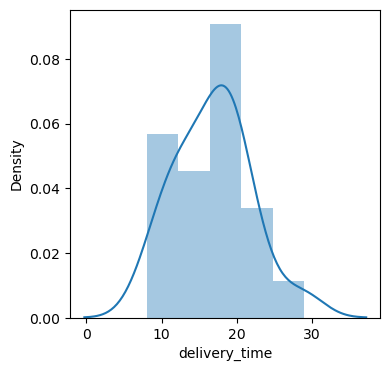

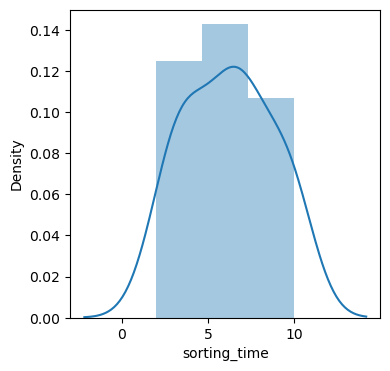

In [16]:
plt.figure(figsize = (4,4))
sns.distplot(deli.delivery_time)

plt.figure(figsize = (4,4))
sns.distplot(deli.sorting_time)



In [17]:
#No outliers above dataset

In [18]:
deli.corr()


,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [19]:
#Correlation coefficient value r = 0.825997 indicates that there is a strong correlation between independent variable and dependent variable

# Model Building

In [20]:
deli.sorting_time.corr(deli.delivery_time)


0.8259972607955327

In [21]:
model=smf.ols("delivery_time~sorting_time",data=deli).fit()


In [22]:
model.params


Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [23]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           3.98e-06
Time:                        12:40:35   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
print(model.conf_int(0.05)) # 95% confidence interval


                     0          1
Intercept     2.979134  10.186334
sorting_time  1.108673   2.189367


In [25]:
pred = model.predict(deli)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

# Salary_hike -> Build a prediction model for Salary_hike


In [26]:
salary=pd.read_csv("Salary_Data.csv")

In [27]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA

In [28]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [29]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [30]:
salary.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [32]:
salary.kurt()

YearsExperience   -1.012212
Salary            -1.295421
dtype: float64

# Visualization

C:\Users\pprat\AppData\Local\Temp\ipykernel_26368\2168162298.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary["YearsExperience"])


<Axes: xlabel='YearsExperience', ylabel='Density'>

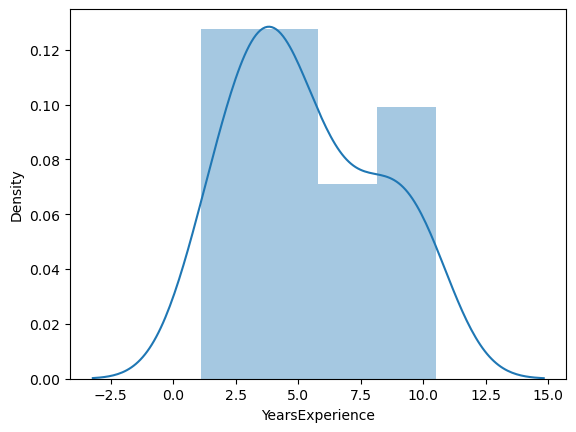

In [33]:
sns.distplot(salary["YearsExperience"])

C:\Users\pprat\AppData\Local\Temp\ipykernel_26368\3712664697.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary["Salary"])


<Axes: xlabel='Salary', ylabel='Density'>

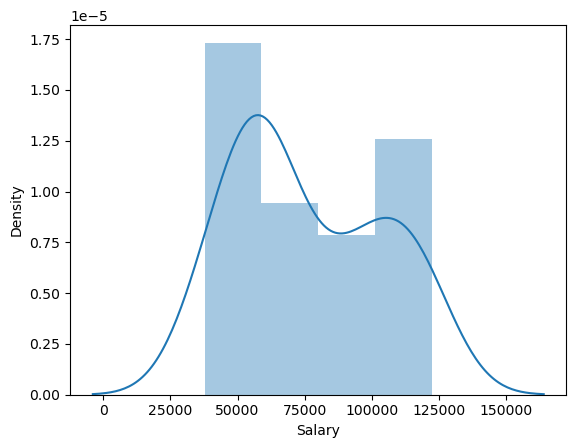

In [35]:
sns.distplot(salary["Salary"])

In [37]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# model building


In [40]:
model=smf.ols("Salary~YearsExperience",data=salary).fit()


In [41]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [43]:
model.tvalues,model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [44]:
Salary = (25792.200199) + (9449.962321)*(3)  #3 yrs of prediction
Salary

54142.087162

In [46]:
data_pred=pd.DataFrame(salary,columns=['YearsExperience'])
data_pred

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [47]:
model.predict(data_pred)


0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64